In [1]:
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor, Compose, Normalize
from torch.utils.data import DataLoader

device = 'cuda'
transform = Compose([ToTensor(), Normalize((0.1307,), (0.3081,))])

datasets = {
    'train': MNIST(root='data', train=True, download=True, transform=transform),
    'test': MNIST(root='data', train=False, download=True, transform=transform)
}

In [2]:
from torch import Tensor
from torch.nn import Module
from torch.nn import Flatten,  Sequential
from torch.nn import Linear, ReLU, Dropout
from model.batched_dropweight import BatchedDropWeightLinear

class Perceptron(Module):
    def __init__(self, input_features: int, hidden_dimension: int, output_features: int, p: float):
        super().__init__()
        self.flatten = Flatten()
        self.layers = Sequential(
            Linear(input_features, hidden_dimension),
            ReLU(),
            Dropout(p),
            Linear(hidden_dimension, output_features),
        )

    def forward(self, input: Tensor) -> Tensor:
        input = self.flatten(input)
        return self.layers(input)
            

class BatchedDropWeightPerceptron(Module):
    def __init__(self, input_features: int, hidden_dimension: int, output_features: int, p: float):
        super().__init__()
        self.flatten = Flatten()
        self.layers = Sequential(
            BatchedDropWeightLinear(input_features, hidden_dimension, p=p, max_batch_size=256),
            ReLU(),
            BatchedDropWeightLinear(hidden_dimension, output_features, p=p, max_batch_size=256),
        )

    def forward(self, input: Tensor) -> Tensor:
        input = self.flatten(input)
        return self.layers(input)

In [3]:
import torch
from torch.optim import SGD, Adam
from torch.nn import CrossEntropyLoss
torch.set_float32_matmul_precision('high')   

from uuid import uuid4
from utils import run
from metrics import Summary

In [4]:
loaders = {
    'train': DataLoader(dataset=datasets['train'],batch_size=64,shuffle=True, pin_memory=True, pin_memory_device=device, num_workers=4),
    'test': DataLoader(dataset=datasets['test'],batch_size=64,shuffle=False, pin_memory=True, pin_memory_device=device, num_workers=4)
}

Running experiment Perceptron with id 8ba6b854-fe96-4758-bcd5-bd9468ee405d
Tensorboard logs are saved in logs/Perceptron-8ba6b854-fe96-4758-bcd5-bd9468ee405d
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): Perceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): Linear(in_features=784, out_features=512, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.3, inplace=False)
      (3): Linear(in_features=512, out_features=10, bias=True)
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)
-------------------------------------------------------------

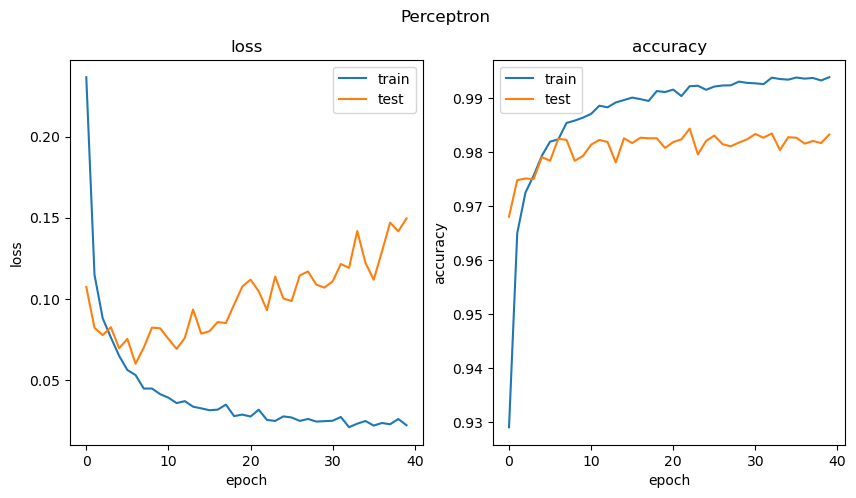

Running experiment BatchedDropWeightPerceptron with id 8ba6b854-fe96-4758-bcd5-bd9468ee405d
Tensorboard logs are saved in logs/BatchedDropWeightPerceptron-8ba6b854-fe96-4758-bcd5-bd9468ee405d
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): BatchedDropWeightPerceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): BatchedDropWeightLinear(in_features=784, out_features=512, bias=True, p=0.3, max_batch_size=256)
      (1): ReLU()
      (2): BatchedDropWeightLinear(in_features=512, out_features=10, bias=True, p=0.3, max_batch_size=256)
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    m

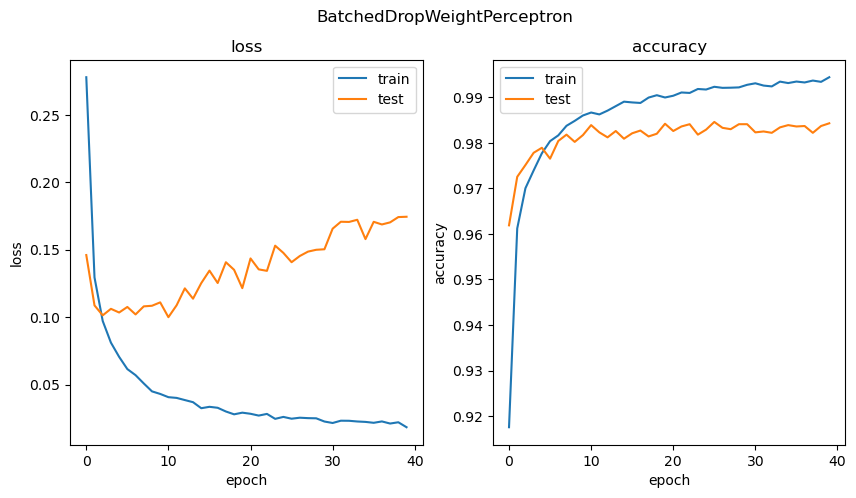

In [5]:
experiment = uuid4()
model = Perceptron(784, 512, 10, p=0.3).to(device)
optimizer = Adam(model.parameters(), lr=0.001)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=40)

model = BatchedDropWeightPerceptron(784, 512, 10, p=0.3).to(device)
optimizer = Adam(model.parameters(), lr=0.001)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=40)

Running experiment Perceptron with id 8a196dc7-4916-4c5e-be10-26eda8339294
Tensorboard logs are saved in logs/Perceptron-8a196dc7-4916-4c5e-be10-26eda8339294
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): Perceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): Linear(in_features=784, out_features=512, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.4, inplace=False)
      (3): Linear(in_features=512, out_features=10, bias=True)
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)
-------------------------------------------------------------

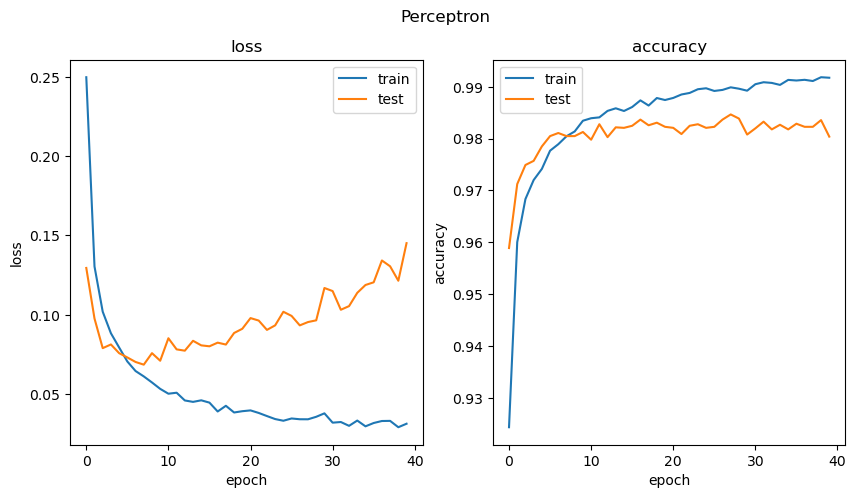

Running experiment BatchedDropWeightPerceptron with id 8a196dc7-4916-4c5e-be10-26eda8339294
Tensorboard logs are saved in logs/BatchedDropWeightPerceptron-8a196dc7-4916-4c5e-be10-26eda8339294
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): BatchedDropWeightPerceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): BatchedDropWeightLinear(in_features=784, out_features=512, bias=True, p=0.4, max_batch_size=256)
      (1): ReLU()
      (2): BatchedDropWeightLinear(in_features=512, out_features=10, bias=True, p=0.4, max_batch_size=256)
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    m

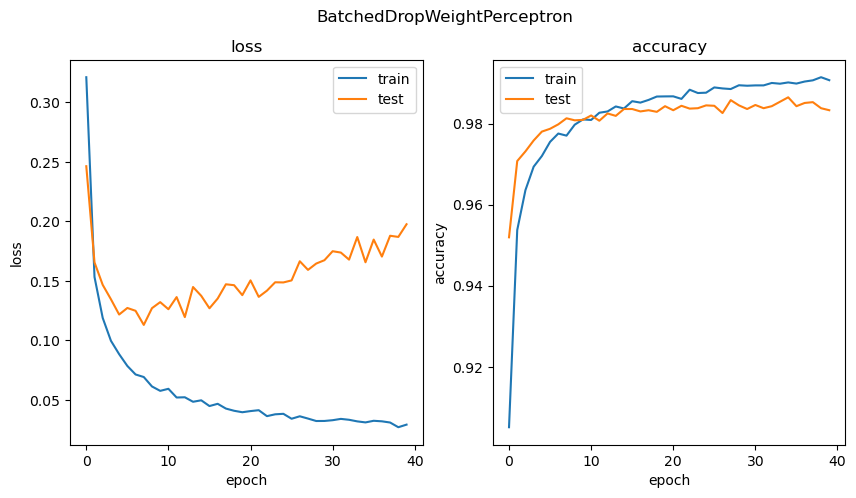

In [6]:
experiment = uuid4()
model = Perceptron(784, 512, 10, p=0.4).to(device)
optimizer = Adam(model.parameters(), lr=0.001)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=40)

model = BatchedDropWeightPerceptron(784, 512, 10, p=0.4).to(device)
optimizer = Adam(model.parameters(), lr=0.001)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=40)

Running experiment Perceptron with id 890f59d6-167c-4237-9b22-232cc90bd56d
Tensorboard logs are saved in logs/Perceptron-890f59d6-167c-4237-9b22-232cc90bd56d
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): Perceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): Linear(in_features=784, out_features=512, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.3, inplace=False)
      (3): Linear(in_features=512, out_features=10, bias=True)
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0001
    maximize: False
    weight_decay: 0
)
------------------------------------------------------------

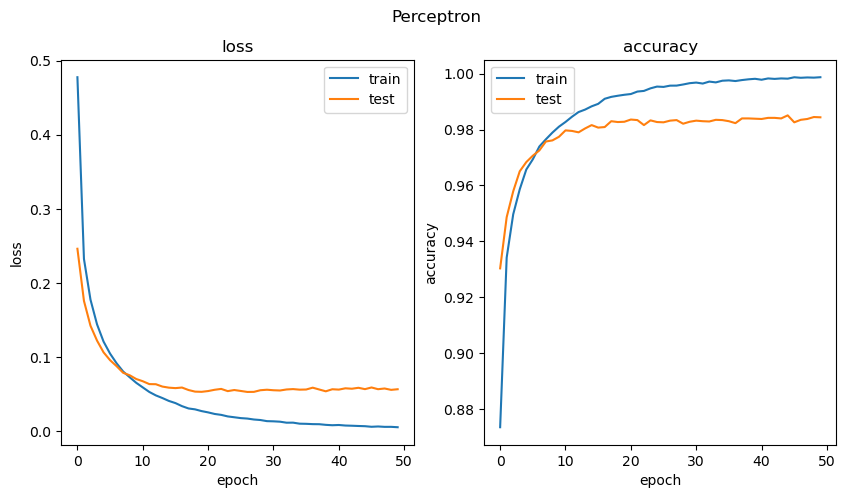

Running experiment BatchedDropWeightPerceptron with id 890f59d6-167c-4237-9b22-232cc90bd56d
Tensorboard logs are saved in logs/BatchedDropWeightPerceptron-890f59d6-167c-4237-9b22-232cc90bd56d
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): BatchedDropWeightPerceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): BatchedDropWeightLinear(in_features=784, out_features=512, bias=True, p=0.3, max_batch_size=256)
      (1): ReLU()
      (2): BatchedDropWeightLinear(in_features=512, out_features=10, bias=True, p=0.3, max_batch_size=256)
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0001
    

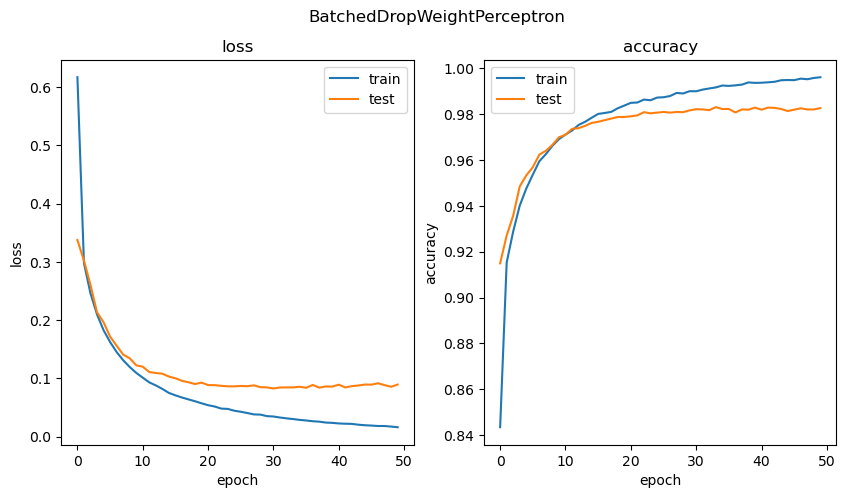

In [7]:
experiment = uuid4()
model = Perceptron(784, 512, 10, p=0.3).to(device)
optimizer = Adam(model.parameters(), lr=0.0001)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

model = BatchedDropWeightPerceptron(784, 512, 10, p=0.3).to(device)
optimizer = Adam(model.parameters(), lr=0.0001)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

Running experiment Perceptron with id 09caec31-8979-4bc0-b3c6-6bf6bce90e58
Tensorboard logs are saved in logs/Perceptron-09caec31-8979-4bc0-b3c6-6bf6bce90e58
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): Perceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): Linear(in_features=784, out_features=512, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.4, inplace=False)
      (3): Linear(in_features=512, out_features=10, bias=True)
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0001
    maximize: False
    weight_decay: 0
)
------------------------------------------------------------

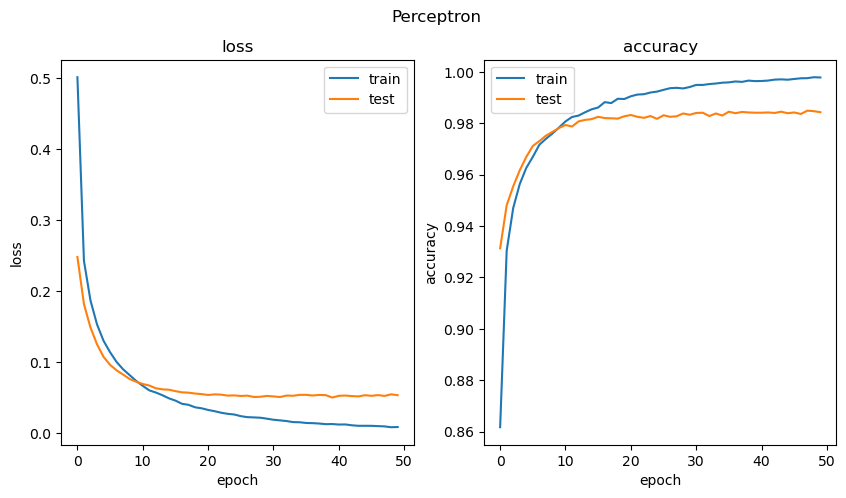

Running experiment BatchedDropWeightPerceptron with id 09caec31-8979-4bc0-b3c6-6bf6bce90e58
Tensorboard logs are saved in logs/BatchedDropWeightPerceptron-09caec31-8979-4bc0-b3c6-6bf6bce90e58
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): BatchedDropWeightPerceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): BatchedDropWeightLinear(in_features=784, out_features=512, bias=True, p=0.4, max_batch_size=256)
      (1): ReLU()
      (2): BatchedDropWeightLinear(in_features=512, out_features=10, bias=True, p=0.4, max_batch_size=256)
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0001
    

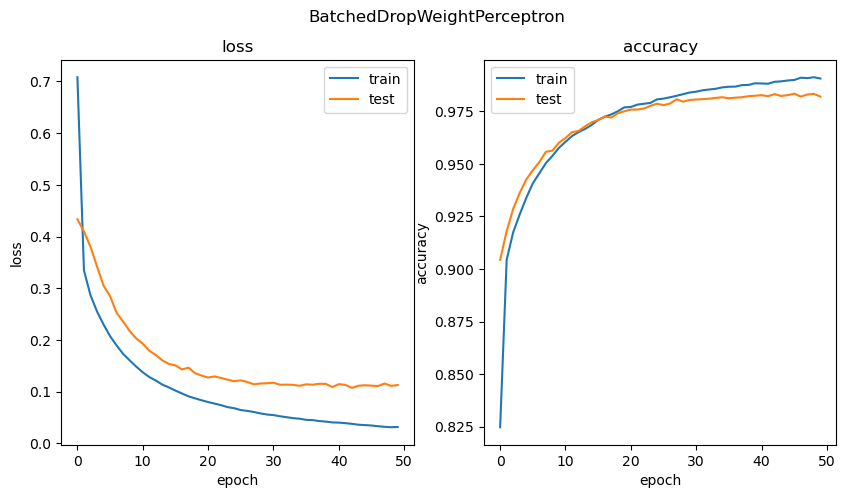

In [8]:
experiment = uuid4()
model = Perceptron(784, 512, 10, p=0.4).to(device)
optimizer = Adam(model.parameters(), lr=0.0001)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

model = BatchedDropWeightPerceptron(784, 512, 10, p=0.4).to(device)
optimizer = Adam(model.parameters(), lr=0.0001)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

Running experiment Perceptron with id 3a0fe13b-3efb-4128-9c09-863f8e9436e6
Tensorboard logs are saved in logs/Perceptron-3a0fe13b-3efb-4128-9c09-863f8e9436e6
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): Perceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): Linear(in_features=784, out_features=512, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.5, inplace=False)
      (3): Linear(in_features=512, out_features=10, bias=True)
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0001
    maximize: False
    weight_decay: 0
)
------------------------------------------------------------

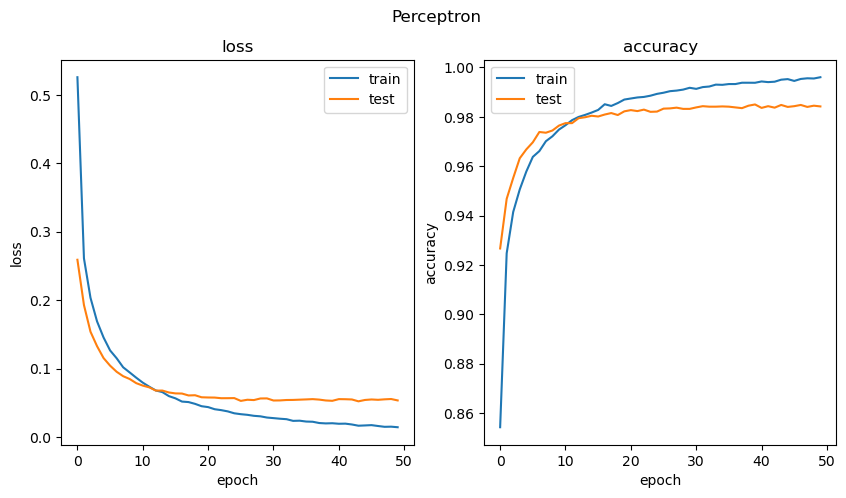

Running experiment BatchedDropWeightPerceptron with id 3a0fe13b-3efb-4128-9c09-863f8e9436e6
Tensorboard logs are saved in logs/BatchedDropWeightPerceptron-3a0fe13b-3efb-4128-9c09-863f8e9436e6
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): BatchedDropWeightPerceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): BatchedDropWeightLinear(in_features=784, out_features=512, bias=True, p=0.5, max_batch_size=256)
      (1): ReLU()
      (2): BatchedDropWeightLinear(in_features=512, out_features=10, bias=True, p=0.5, max_batch_size=256)
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0001
    

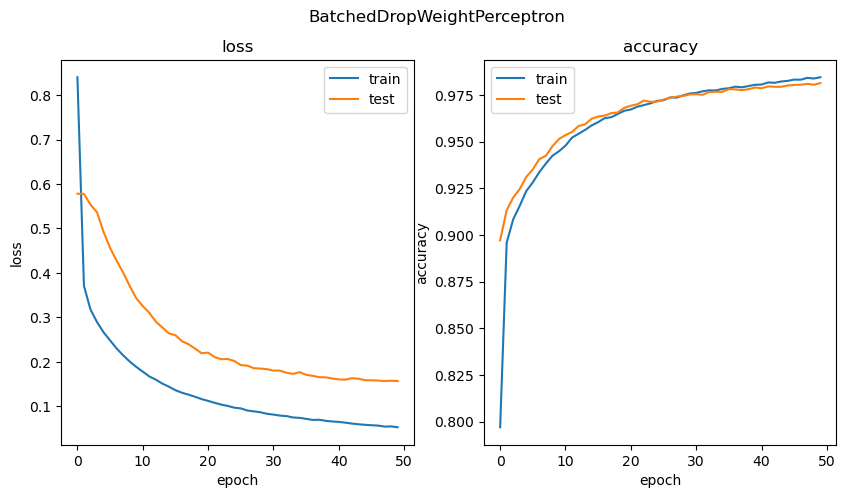

In [9]:
experiment = uuid4()
model = Perceptron(784, 512, 10, p=0.5).to(device)
optimizer = Adam(model.parameters(), lr=0.0001)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

model = BatchedDropWeightPerceptron(784, 512, 10, p=0.5).to(device)
optimizer = Adam(model.parameters(), lr=0.0001)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

Running experiment BatchedDropWeightPerceptron with id a0411a83-c39d-483e-9ed4-46d22f90624a
Tensorboard logs are saved in logs/BatchedDropWeightPerceptron-a0411a83-c39d-483e-9ed4-46d22f90624a
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): BatchedDropWeightPerceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): BatchedDropWeightLinear(in_features=784, out_features=512, bias=True, p=0.5, max_batch_size=256)
      (1): ReLU()
      (2): BatchedDropWeightLinear(in_features=512, out_features=10, bias=True, p=0.5, max_batch_size=256)
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0001
    

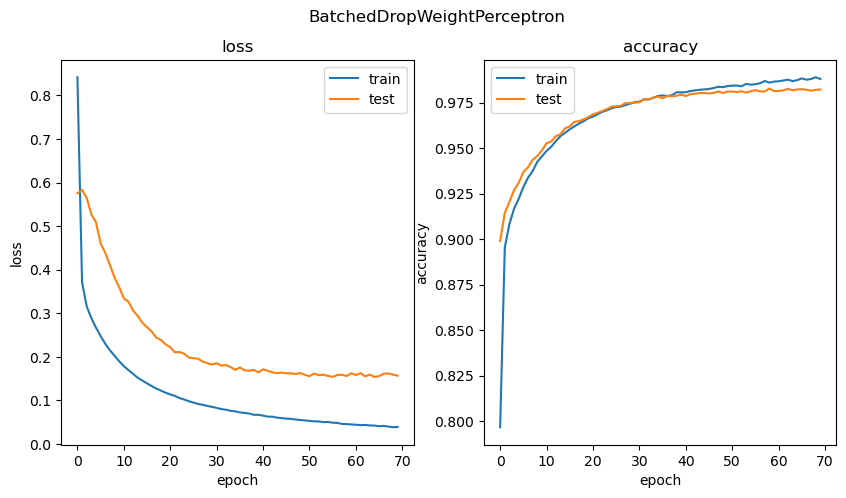

In [10]:
experiment = uuid4()
model = BatchedDropWeightPerceptron(784, 512, 10, p=0.5).to(device)
optimizer = Adam(model.parameters(), lr=0.0001)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=70)

Running experiment Perceptron with id b97c3391-104d-4d8e-8304-5e06aa7546fd
Tensorboard logs are saved in logs/Perceptron-b97c3391-104d-4d8e-8304-5e06aa7546fd
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): Perceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): Linear(in_features=784, out_features=512, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.5, inplace=False)
      (3): Linear(in_features=512, out_features=10, bias=True)
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0001
    maximize: False
    weight_decay: 0
)
------------------------------------------------------------

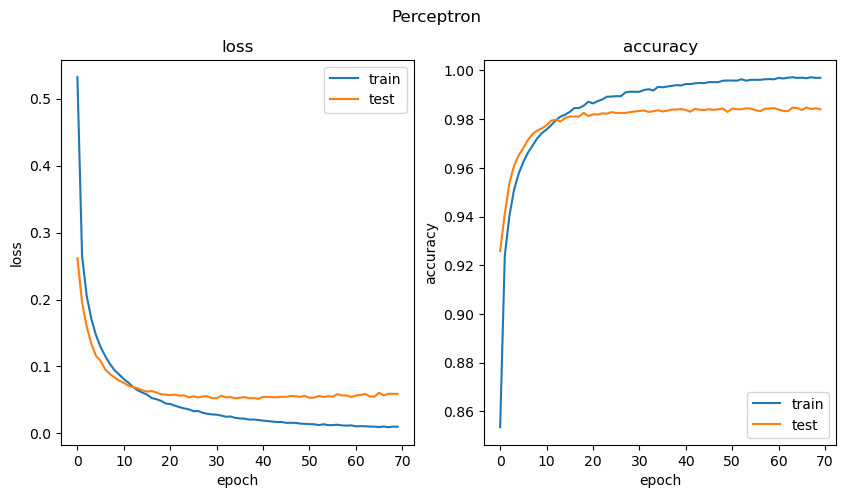

In [11]:
from uuid import UUID

experiment = UUID('b97c3391-104d-4d8e-8304-5e06aa7546fd')

model = Perceptron(784, 512, 10, p=0.5).to(device)
optimizer = Adam(model.parameters(), lr=0.0001)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=70)

Running experiment Perceptron with id df5306c3-4afc-4678-bfe9-dce0d31223c2
Tensorboard logs are saved in logs/Perceptron-df5306c3-4afc-4678-bfe9-dce0d31223c2
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): Perceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): Linear(in_features=784, out_features=512, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.5, inplace=False)
      (3): Linear(in_features=512, out_features=10, bias=True)
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0002
    maximize: False
    weight_decay: 0
)
------------------------------------------------------------

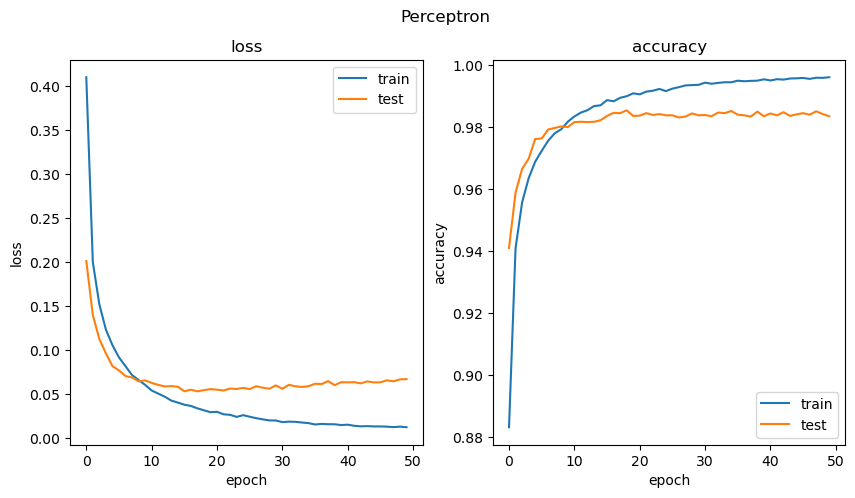

Running experiment BatchedDropWeightPerceptron with id df5306c3-4afc-4678-bfe9-dce0d31223c2
Tensorboard logs are saved in logs/BatchedDropWeightPerceptron-df5306c3-4afc-4678-bfe9-dce0d31223c2
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): BatchedDropWeightPerceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): BatchedDropWeightLinear(in_features=784, out_features=512, bias=True, p=0.5, max_batch_size=256)
      (1): ReLU()
      (2): BatchedDropWeightLinear(in_features=512, out_features=10, bias=True, p=0.5, max_batch_size=256)
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0002
    

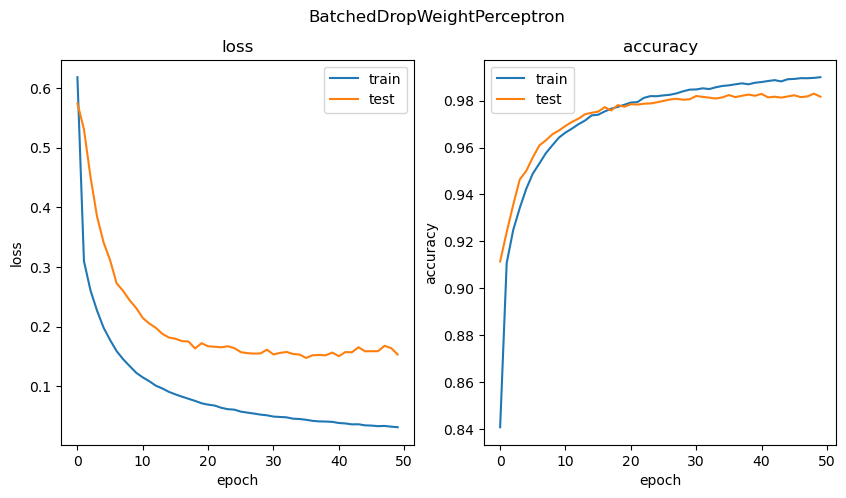

In [12]:
experiment = uuid4()
model = Perceptron(784, 512, 10, p=0.5).to(device)
optimizer = Adam(model.parameters(), lr=0.0002)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

model = BatchedDropWeightPerceptron(784, 512, 10, p=0.5).to(device)
optimizer = Adam(model.parameters(), lr=0.0002)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

Running experiment Perceptron with id 66487138-f8d0-41f1-9cad-ebd7688704ec
Tensorboard logs are saved in logs/Perceptron-66487138-f8d0-41f1-9cad-ebd7688704ec
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): Perceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): Linear(in_features=784, out_features=256, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.3, inplace=False)
      (3): Linear(in_features=256, out_features=10, bias=True)
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0002
    maximize: False
    weight_decay: 0
)
------------------------------------------------------------

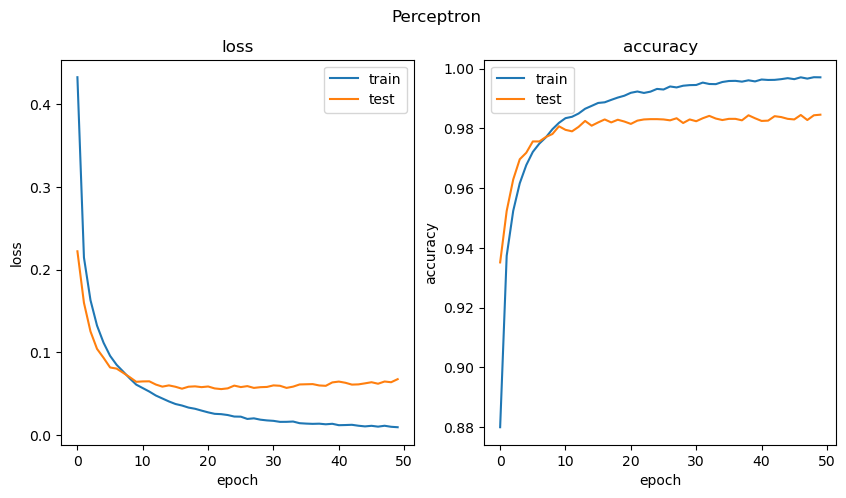

Running experiment BatchedDropWeightPerceptron with id 66487138-f8d0-41f1-9cad-ebd7688704ec
Tensorboard logs are saved in logs/BatchedDropWeightPerceptron-66487138-f8d0-41f1-9cad-ebd7688704ec
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): BatchedDropWeightPerceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): BatchedDropWeightLinear(in_features=784, out_features=256, bias=True, p=0.3, max_batch_size=256)
      (1): ReLU()
      (2): BatchedDropWeightLinear(in_features=256, out_features=10, bias=True, p=0.3, max_batch_size=256)
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0002
    

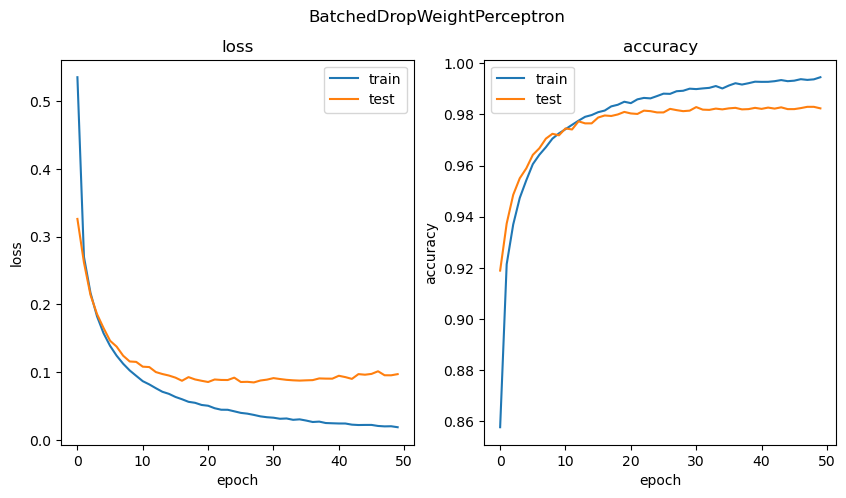

In [13]:
experiment = uuid4()
model = Perceptron(784, 256, 10, p=0.3).to(device)
optimizer = Adam(model.parameters(), lr=0.0002)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

model = BatchedDropWeightPerceptron(784, 256, 10, p=0.3).to(device)
optimizer = Adam(model.parameters(), lr=0.0002)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

Running experiment Perceptron with id d1c4c61b-07e3-4e7c-aa35-6f3622303936
Tensorboard logs are saved in logs/Perceptron-d1c4c61b-07e3-4e7c-aa35-6f3622303936
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): Perceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): Linear(in_features=784, out_features=256, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.4, inplace=False)
      (3): Linear(in_features=256, out_features=10, bias=True)
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0002
    maximize: False
    weight_decay: 0
)
------------------------------------------------------------

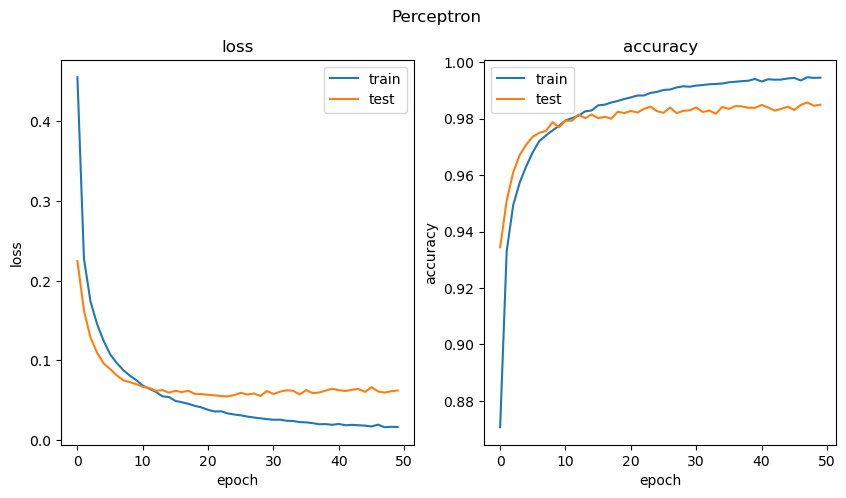

Running experiment BatchedDropWeightPerceptron with id d1c4c61b-07e3-4e7c-aa35-6f3622303936
Tensorboard logs are saved in logs/BatchedDropWeightPerceptron-d1c4c61b-07e3-4e7c-aa35-6f3622303936
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): BatchedDropWeightPerceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): BatchedDropWeightLinear(in_features=784, out_features=256, bias=True, p=0.4, max_batch_size=256)
      (1): ReLU()
      (2): BatchedDropWeightLinear(in_features=256, out_features=10, bias=True, p=0.4, max_batch_size=256)
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0002
    

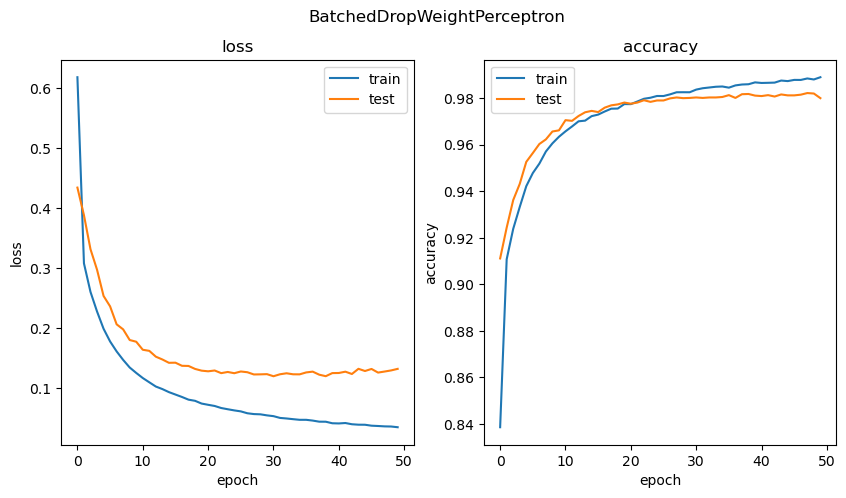

In [14]:
experiment = uuid4()
model = Perceptron(784, 256, 10, p=0.4).to(device)
optimizer = Adam(model.parameters(), lr=0.0002)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

model = BatchedDropWeightPerceptron(784, 256, 10, p=0.4).to(device)
optimizer = Adam(model.parameters(), lr=0.0002)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

Running experiment Perceptron with id ae1a2fbc-af2b-4b68-9e44-fe2b8e542efe
Tensorboard logs are saved in logs/Perceptron-ae1a2fbc-af2b-4b68-9e44-fe2b8e542efe
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): Perceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): Linear(in_features=784, out_features=256, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.5, inplace=False)
      (3): Linear(in_features=256, out_features=10, bias=True)
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0002
    maximize: False
    weight_decay: 0
)
------------------------------------------------------------

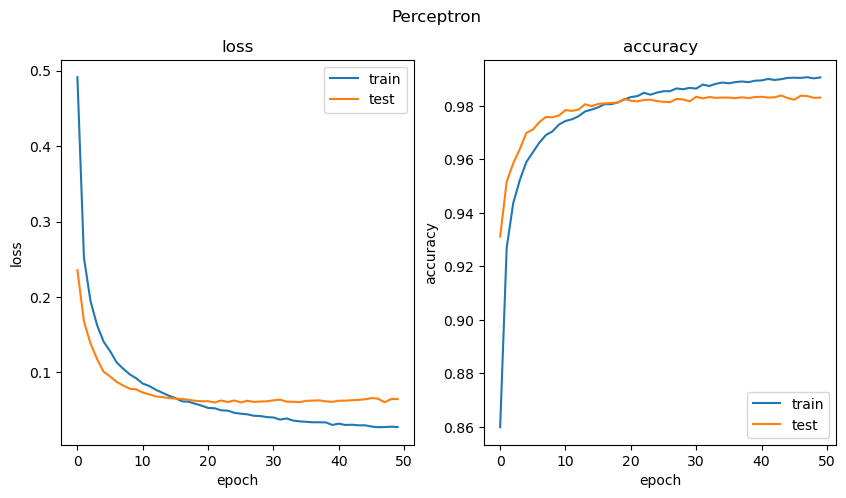

Running experiment BatchedDropWeightPerceptron with id ae1a2fbc-af2b-4b68-9e44-fe2b8e542efe
Tensorboard logs are saved in logs/BatchedDropWeightPerceptron-ae1a2fbc-af2b-4b68-9e44-fe2b8e542efe
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): BatchedDropWeightPerceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): BatchedDropWeightLinear(in_features=784, out_features=256, bias=True, p=0.5, max_batch_size=256)
      (1): ReLU()
      (2): BatchedDropWeightLinear(in_features=256, out_features=10, bias=True, p=0.5, max_batch_size=256)
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0002
    

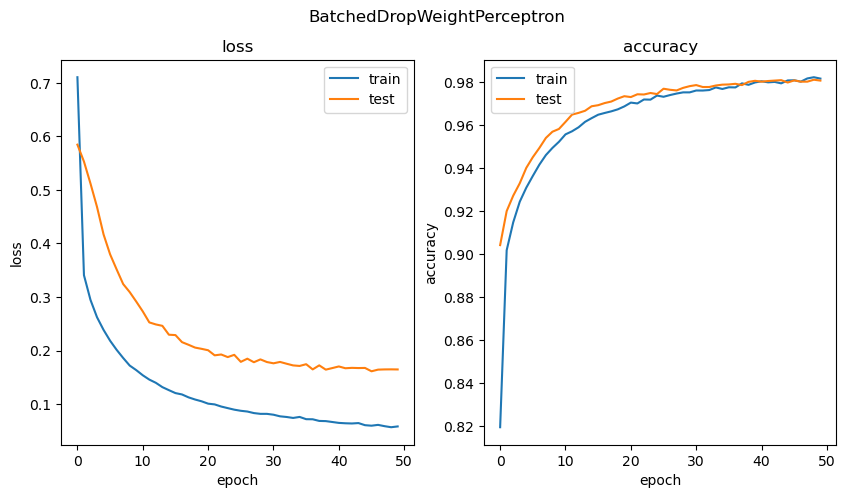

In [15]:
experiment = uuid4()
model = Perceptron(784, 256, 10, p=0.5).to(device)
optimizer = Adam(model.parameters(), lr=0.0002)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

model = BatchedDropWeightPerceptron(784, 256, 10, p=0.5).to(device)
optimizer = Adam(model.parameters(), lr=0.0002)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

Running experiment Perceptron with id 23990ba9-4e29-4e6b-b51e-4bd3083d57fb
Tensorboard logs are saved in logs/Perceptron-23990ba9-4e29-4e6b-b51e-4bd3083d57fb
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): Perceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): Linear(in_features=784, out_features=512, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.3, inplace=False)
      (3): Linear(in_features=512, out_features=10, bias=True)
    )
  )
)
----------------------------------------------------------------
optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)
----------------------------------------------------------------
criterion: CrossEntrop

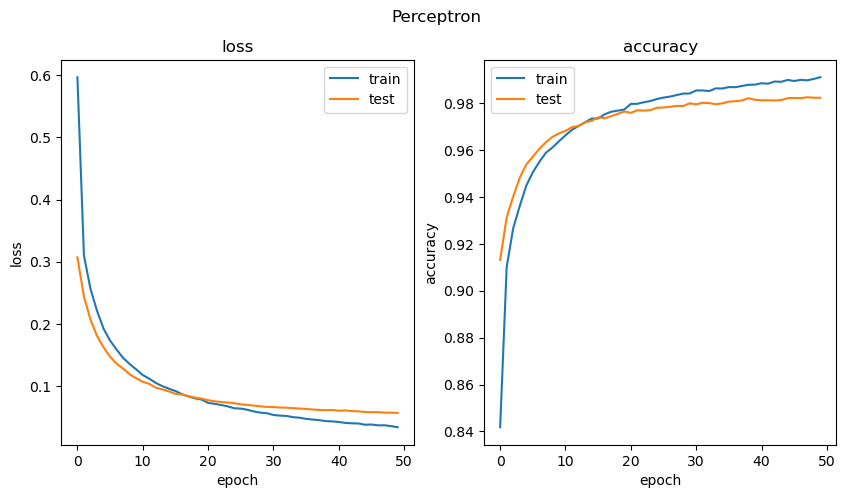

Running experiment BatchedDropWeightPerceptron with id 23990ba9-4e29-4e6b-b51e-4bd3083d57fb
Tensorboard logs are saved in logs/BatchedDropWeightPerceptron-23990ba9-4e29-4e6b-b51e-4bd3083d57fb
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): BatchedDropWeightPerceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): BatchedDropWeightLinear(in_features=784, out_features=512, bias=True, p=0.3, max_batch_size=256)
      (1): ReLU()
      (2): BatchedDropWeightLinear(in_features=512, out_features=10, bias=True, p=0.3, max_batch_size=256)
    )
  )
)
----------------------------------------------------------------
optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_

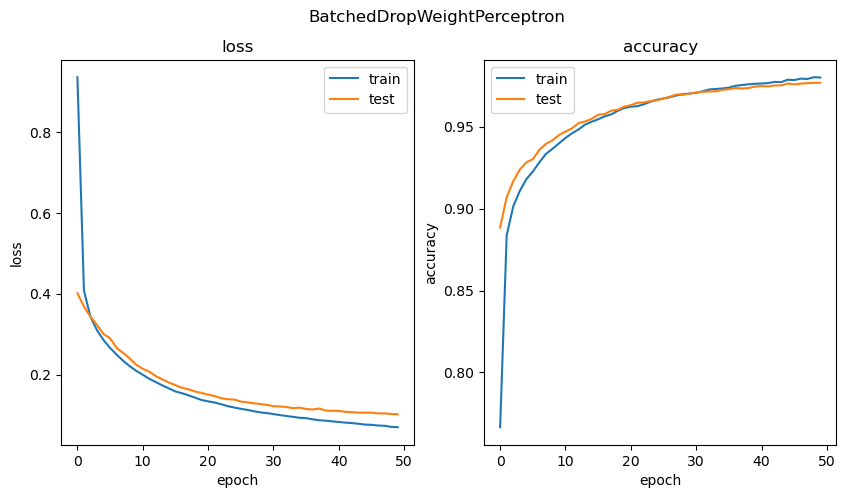

In [16]:
experiment = uuid4()
model = Perceptron(784, 512, 10, p=0.3).to(device)
optimizer = SGD(model.parameters(), lr=0.001, momentum=0.9)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

model = BatchedDropWeightPerceptron(784, 512, 10, p=0.3).to(device)
optimizer = SGD(model.parameters(), lr=0.001, momentum=0.9)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

Running experiment Perceptron with id a9e73c1c-1158-4a60-b64a-59ccdc0077eb
Tensorboard logs are saved in logs/Perceptron-a9e73c1c-1158-4a60-b64a-59ccdc0077eb
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): Perceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): Linear(in_features=784, out_features=512, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.4, inplace=False)
      (3): Linear(in_features=512, out_features=10, bias=True)
    )
  )
)
----------------------------------------------------------------
optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)
----------------------------------------------------------------
criterion: CrossEntrop

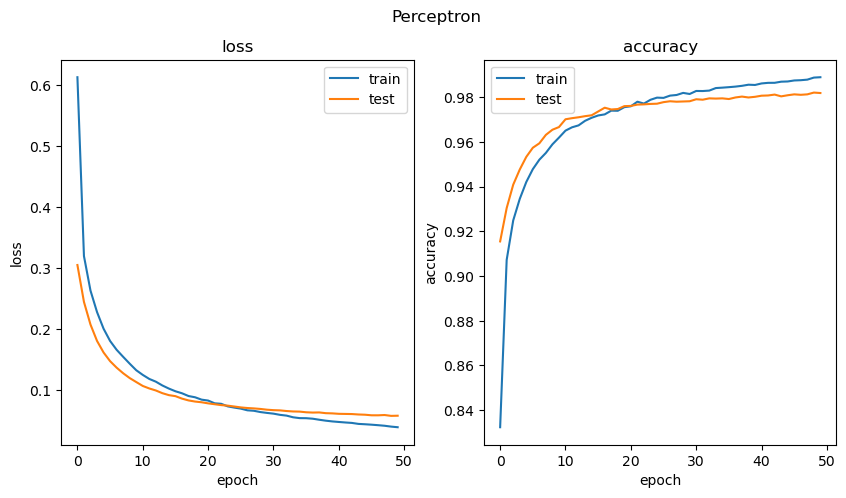

Running experiment BatchedDropWeightPerceptron with id a9e73c1c-1158-4a60-b64a-59ccdc0077eb
Tensorboard logs are saved in logs/BatchedDropWeightPerceptron-a9e73c1c-1158-4a60-b64a-59ccdc0077eb
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): BatchedDropWeightPerceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): BatchedDropWeightLinear(in_features=784, out_features=512, bias=True, p=0.4, max_batch_size=256)
      (1): ReLU()
      (2): BatchedDropWeightLinear(in_features=512, out_features=10, bias=True, p=0.4, max_batch_size=256)
    )
  )
)
----------------------------------------------------------------
optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_

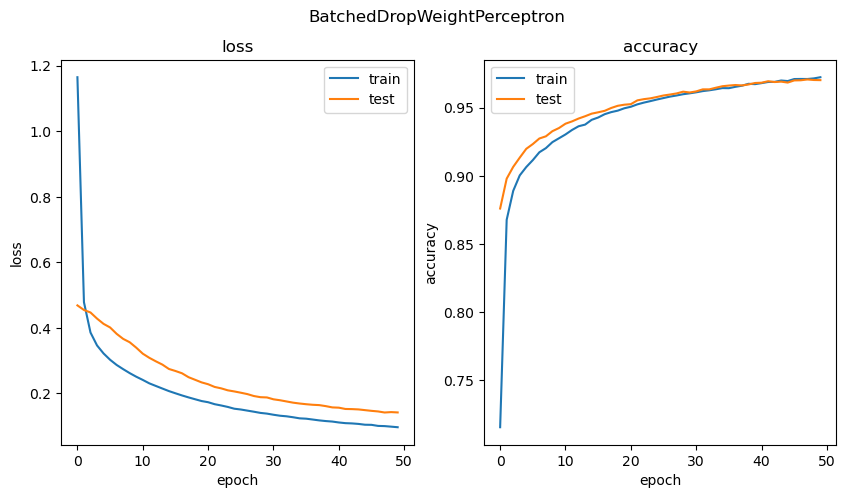

In [17]:
experiment = uuid4()
model = Perceptron(784, 512, 10, p=0.4).to(device)
optimizer = SGD(model.parameters(), lr=0.001, momentum=0.9)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

model = BatchedDropWeightPerceptron(784, 512, 10, p=0.4).to(device)
optimizer = SGD(model.parameters(), lr=0.001, momentum=0.9)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

Running experiment Perceptron with id a6844296-e768-4023-9512-5db61839fe9a
Tensorboard logs are saved in logs/Perceptron-a6844296-e768-4023-9512-5db61839fe9a
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): Perceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): Linear(in_features=784, out_features=512, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.5, inplace=False)
      (3): Linear(in_features=512, out_features=10, bias=True)
    )
  )
)
----------------------------------------------------------------
optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)
----------------------------------------------------------------
criterion: CrossEntrop

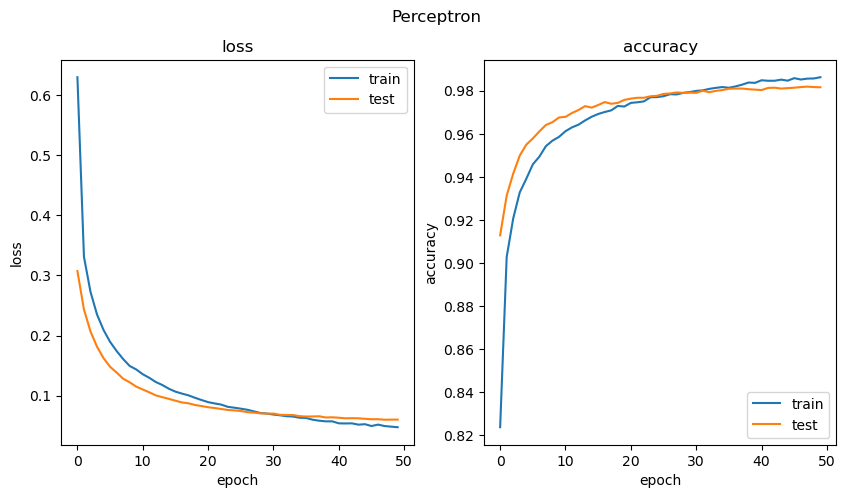

Running experiment BatchedDropWeightPerceptron with id a6844296-e768-4023-9512-5db61839fe9a
Tensorboard logs are saved in logs/BatchedDropWeightPerceptron-a6844296-e768-4023-9512-5db61839fe9a
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): BatchedDropWeightPerceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): BatchedDropWeightLinear(in_features=784, out_features=512, bias=True, p=0.5, max_batch_size=256)
      (1): ReLU()
      (2): BatchedDropWeightLinear(in_features=512, out_features=10, bias=True, p=0.5, max_batch_size=256)
    )
  )
)
----------------------------------------------------------------
optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_

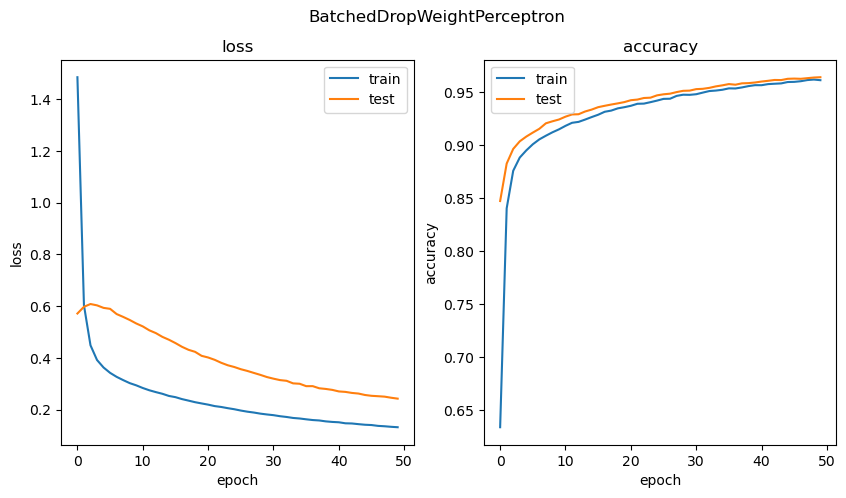

In [18]:
experiment = uuid4()
model = Perceptron(784, 512, 10, p=0.5).to(device)
optimizer = SGD(model.parameters(), lr=0.001, momentum=0.9)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

model = BatchedDropWeightPerceptron(784, 512, 10, p=0.5).to(device)
optimizer = SGD(model.parameters(), lr=0.001, momentum=0.9)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

Running experiment Perceptron with id 7b4a0bab-c497-454f-ac63-4fc419abd985
Tensorboard logs are saved in logs/Perceptron-7b4a0bab-c497-454f-ac63-4fc419abd985
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): Perceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): Linear(in_features=784, out_features=256, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.3, inplace=False)
      (3): Linear(in_features=256, out_features=10, bias=True)
    )
  )
)
----------------------------------------------------------------
optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)
----------------------------------------------------------------
criterion: CrossEntrop

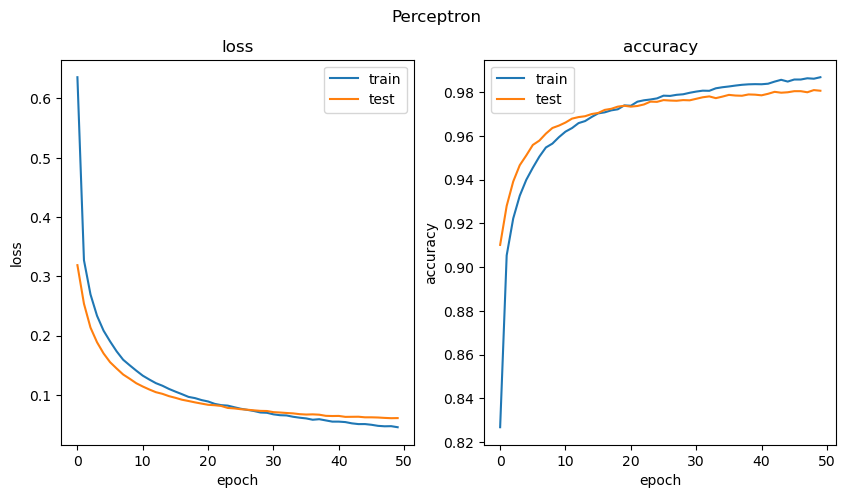

Running experiment BatchedDropWeightPerceptron with id 7b4a0bab-c497-454f-ac63-4fc419abd985
Tensorboard logs are saved in logs/BatchedDropWeightPerceptron-7b4a0bab-c497-454f-ac63-4fc419abd985
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): BatchedDropWeightPerceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): BatchedDropWeightLinear(in_features=784, out_features=256, bias=True, p=0.3, max_batch_size=256)
      (1): ReLU()
      (2): BatchedDropWeightLinear(in_features=256, out_features=10, bias=True, p=0.3, max_batch_size=256)
    )
  )
)
----------------------------------------------------------------
optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_

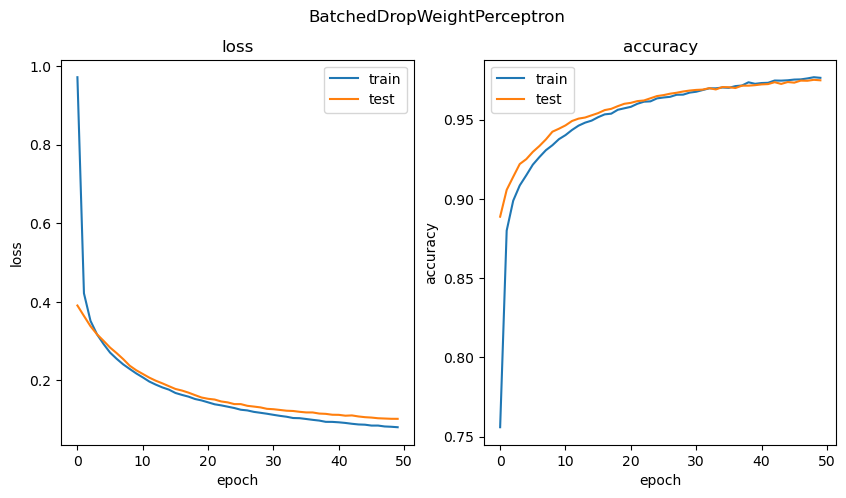

In [19]:
experiment = uuid4()
model = Perceptron(784, 256, 10, p=0.3).to(device)
optimizer = SGD(model.parameters(), lr=0.001, momentum=0.9)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

model = BatchedDropWeightPerceptron(784, 256, 10, p=0.3).to(device)
optimizer = SGD(model.parameters(), lr=0.001, momentum=0.9)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

Running experiment Perceptron with id 6e68eae9-d44c-4a76-9567-dc6a2c89c3fd
Tensorboard logs are saved in logs/Perceptron-6e68eae9-d44c-4a76-9567-dc6a2c89c3fd
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): Perceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): Linear(in_features=784, out_features=256, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.4, inplace=False)
      (3): Linear(in_features=256, out_features=10, bias=True)
    )
  )
)
----------------------------------------------------------------
optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)
----------------------------------------------------------------
criterion: CrossEntrop

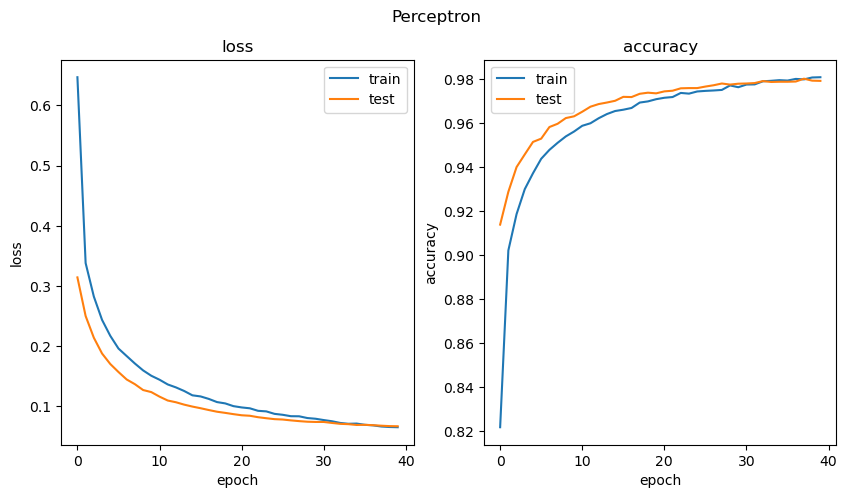

Running experiment BatchedDropWeightPerceptron with id 6e68eae9-d44c-4a76-9567-dc6a2c89c3fd
Tensorboard logs are saved in logs/BatchedDropWeightPerceptron-6e68eae9-d44c-4a76-9567-dc6a2c89c3fd
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): BatchedDropWeightPerceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): BatchedDropWeightLinear(in_features=784, out_features=256, bias=True, p=0.4, max_batch_size=256)
      (1): ReLU()
      (2): BatchedDropWeightLinear(in_features=256, out_features=10, bias=True, p=0.4, max_batch_size=256)
    )
  )
)
----------------------------------------------------------------
optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_

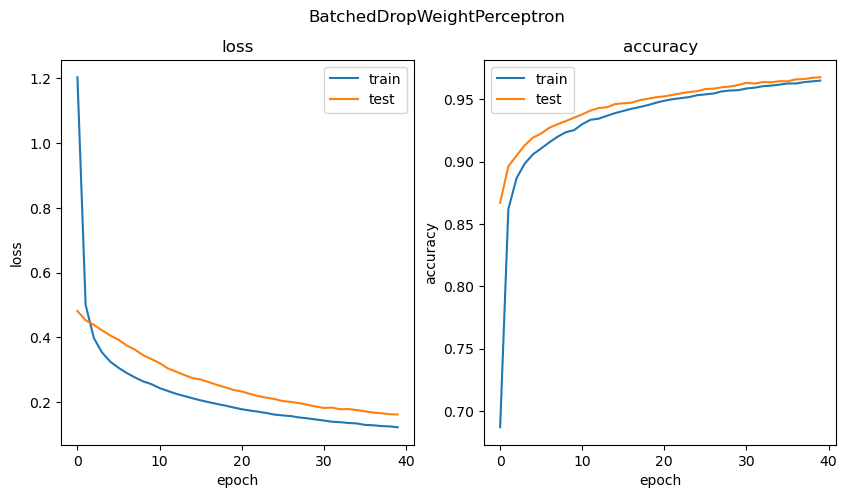

In [20]:
experiment = uuid4()
model = Perceptron(784, 256, 10, p=0.4).to(device)
optimizer = SGD(model.parameters(), lr=0.001, momentum=0.9)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=40)

model = BatchedDropWeightPerceptron(784, 256, 10, p=0.4).to(device)
optimizer = SGD(model.parameters(), lr=0.001, momentum=0.9)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=40)

Running experiment Perceptron with id 3faabd98-57f1-489f-8532-9d5739a1d146
Tensorboard logs are saved in logs/Perceptron-3faabd98-57f1-489f-8532-9d5739a1d146
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): Perceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): Linear(in_features=784, out_features=256, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.5, inplace=False)
      (3): Linear(in_features=256, out_features=10, bias=True)
    )
  )
)
----------------------------------------------------------------
optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)
----------------------------------------------------------------
criterion: CrossEntrop

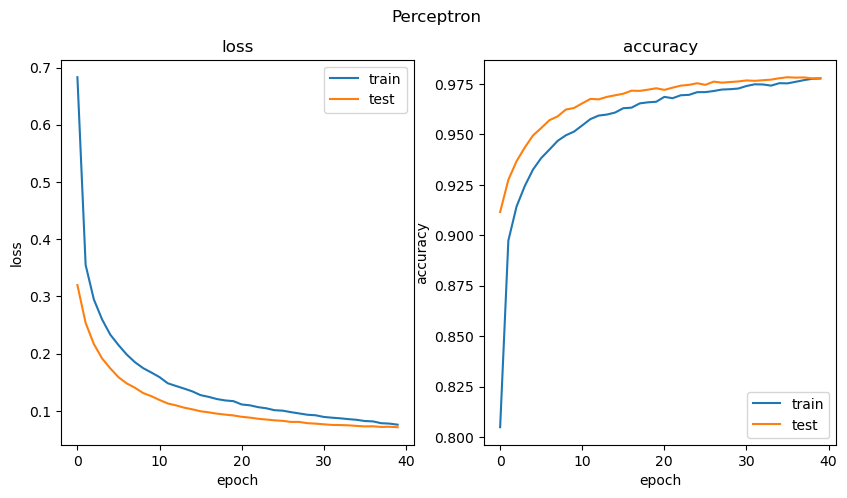

Running experiment BatchedDropWeightPerceptron with id 3faabd98-57f1-489f-8532-9d5739a1d146
Tensorboard logs are saved in logs/BatchedDropWeightPerceptron-3faabd98-57f1-489f-8532-9d5739a1d146
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): BatchedDropWeightPerceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): BatchedDropWeightLinear(in_features=784, out_features=256, bias=True, p=0.5, max_batch_size=256)
      (1): ReLU()
      (2): BatchedDropWeightLinear(in_features=256, out_features=10, bias=True, p=0.5, max_batch_size=256)
    )
  )
)
----------------------------------------------------------------
optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_

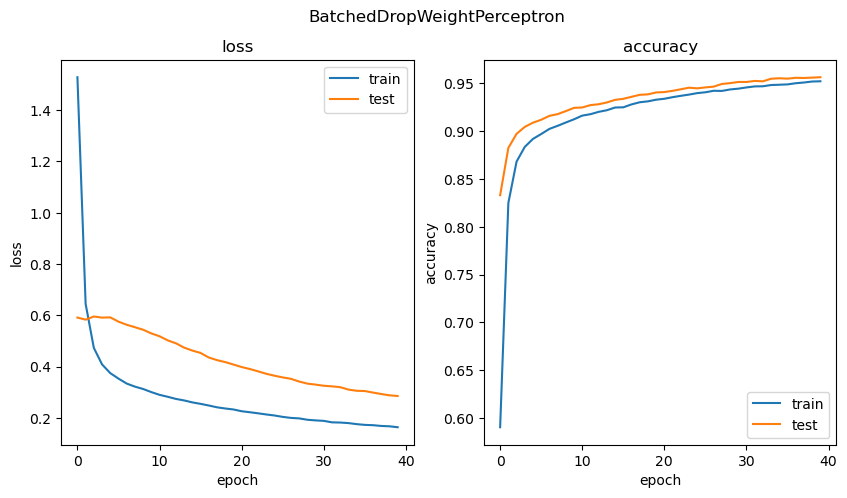

In [21]:
experiment = uuid4()
model = Perceptron(784, 256, 10, p=0.5).to(device)
optimizer = SGD(model.parameters(), lr=0.001, momentum=0.9)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=40)

model = BatchedDropWeightPerceptron(784, 256, 10, p=0.5).to(device)
optimizer = SGD(model.parameters(), lr=0.001, momentum=0.9)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=40)

Running experiment Perceptron16 with id 05d1e60c-a69b-480d-8185-51594000a696
Tensorboard logs are saved in logs/Perceptron16-05d1e60c-a69b-480d-8185-51594000a696
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): Perceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): Linear(in_features=784, out_features=512, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.5, inplace=False)
      (3): Linear(in_features=512, out_features=10, bias=True)
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0002
    maximize: False
    weight_decay: 0
)
--------------------------------------------------------

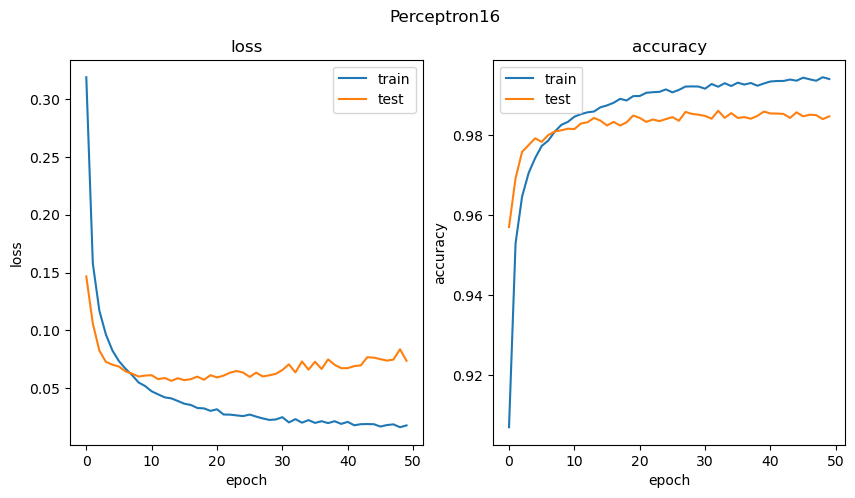

Running experiment BatchedDropWeightPerceptron16 with id 05d1e60c-a69b-480d-8185-51594000a696
Tensorboard logs are saved in logs/BatchedDropWeightPerceptron16-05d1e60c-a69b-480d-8185-51594000a696
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): BatchedDropWeightPerceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): BatchedDropWeightLinear(in_features=784, out_features=512, bias=True, p=0.5, max_batch_size=256)
      (1): ReLU()
      (2): BatchedDropWeightLinear(in_features=512, out_features=10, bias=True, p=0.5, max_batch_size=256)
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0002


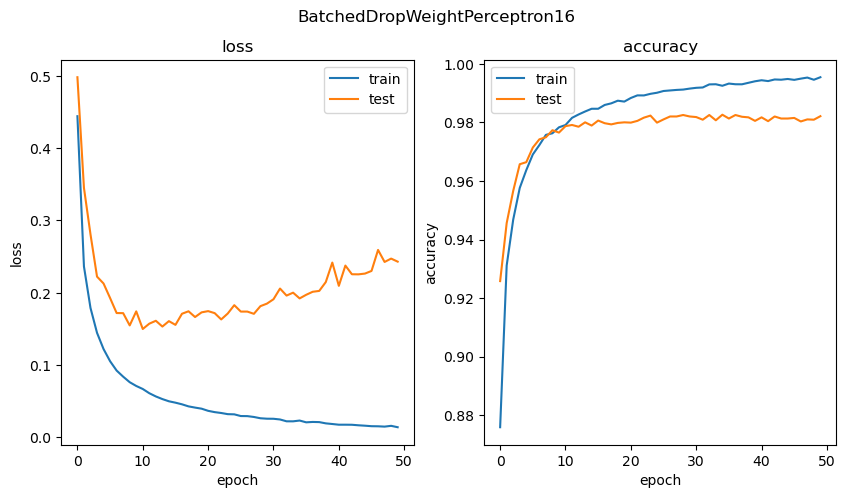

In [22]:
BATCH_SIZE = 16

loaders = {
    'train': DataLoader(dataset=datasets['train'],batch_size=BATCH_SIZE,shuffle=True, pin_memory=True, pin_memory_device=device, num_workers=4),
    'test': DataLoader(dataset=datasets['test'],batch_size=BATCH_SIZE,shuffle=False, pin_memory=True, pin_memory_device=device, num_workers=4)
}

experiment = uuid4()
model = Perceptron(784, 512, 10, p=0.5).to(device)
optimizer = Adam(model.parameters(), lr=0.0002)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__ + str(BATCH_SIZE), id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

model = BatchedDropWeightPerceptron(784, 512, 10, p=0.5).to(device)
optimizer = Adam(model.parameters(), lr=0.0002)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__ + str(BATCH_SIZE), id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

Running experiment Perceptron32 with id 2ed6c0da-e184-4b81-bdc5-3523321eecb5
Tensorboard logs are saved in logs/Perceptron32-2ed6c0da-e184-4b81-bdc5-3523321eecb5
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): Perceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): Linear(in_features=784, out_features=512, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.5, inplace=False)
      (3): Linear(in_features=512, out_features=10, bias=True)
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0002
    maximize: False
    weight_decay: 0
)
--------------------------------------------------------

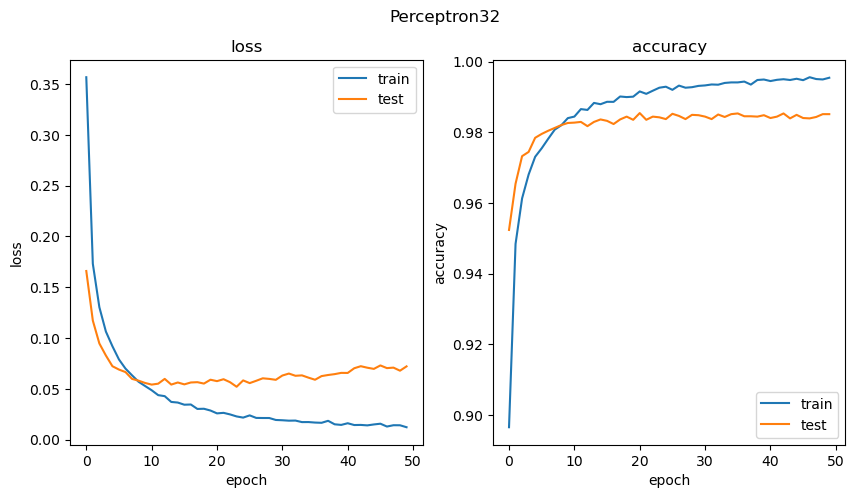

Running experiment BatchedDropWeightPerceptron32 with id 2ed6c0da-e184-4b81-bdc5-3523321eecb5
Tensorboard logs are saved in logs/BatchedDropWeightPerceptron32-2ed6c0da-e184-4b81-bdc5-3523321eecb5
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): BatchedDropWeightPerceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): BatchedDropWeightLinear(in_features=784, out_features=512, bias=True, p=0.5, max_batch_size=256)
      (1): ReLU()
      (2): BatchedDropWeightLinear(in_features=512, out_features=10, bias=True, p=0.5, max_batch_size=256)
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0002


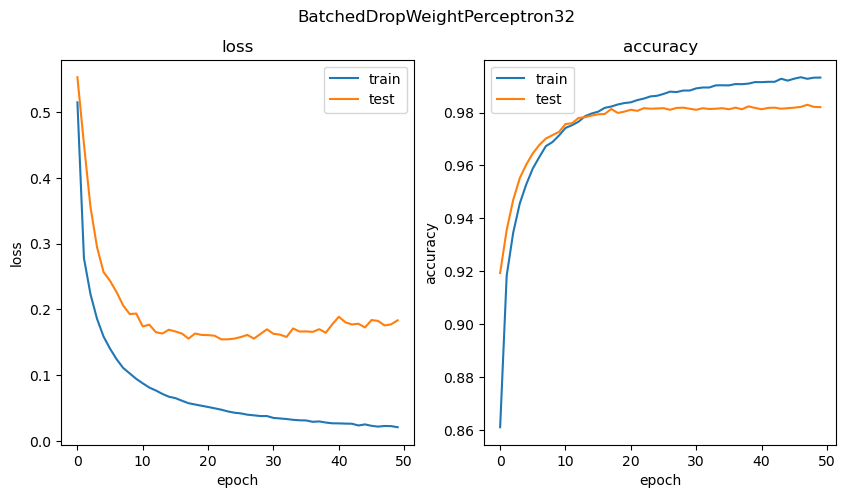

In [23]:
BATCH_SIZE = 32

loaders = {
    'train': DataLoader(dataset=datasets['train'],batch_size=BATCH_SIZE,shuffle=True, pin_memory=True, pin_memory_device=device, num_workers=4),
    'test': DataLoader(dataset=datasets['test'],batch_size=BATCH_SIZE,shuffle=False, pin_memory=True, pin_memory_device=device, num_workers=4)
}

experiment = uuid4()
model = Perceptron(784, 512, 10, p=0.5).to(device)
optimizer = Adam(model.parameters(), lr=0.0002)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__ + str(BATCH_SIZE), id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

model = BatchedDropWeightPerceptron(784, 512, 10, p=0.5).to(device)
optimizer = Adam(model.parameters(), lr=0.0002)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__ + str(BATCH_SIZE), id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

Running experiment Perceptron64 with id a214c9d2-d23c-414f-a61f-0569c0d1acb2
Tensorboard logs are saved in logs/Perceptron64-a214c9d2-d23c-414f-a61f-0569c0d1acb2
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): Perceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): Linear(in_features=784, out_features=512, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.5, inplace=False)
      (3): Linear(in_features=512, out_features=10, bias=True)
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0002
    maximize: False
    weight_decay: 0
)
--------------------------------------------------------

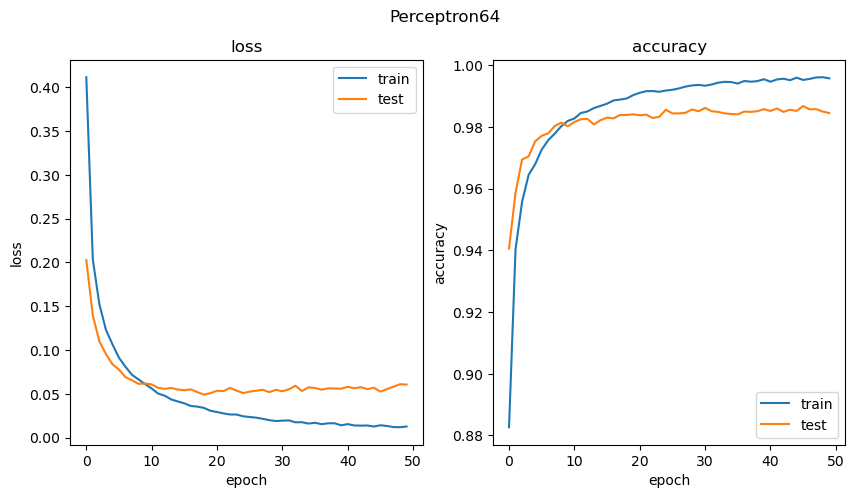

Running experiment BatchedDropWeightPerceptron64 with id a214c9d2-d23c-414f-a61f-0569c0d1acb2
Tensorboard logs are saved in logs/BatchedDropWeightPerceptron64-a214c9d2-d23c-414f-a61f-0569c0d1acb2
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): BatchedDropWeightPerceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): BatchedDropWeightLinear(in_features=784, out_features=512, bias=True, p=0.5, max_batch_size=256)
      (1): ReLU()
      (2): BatchedDropWeightLinear(in_features=512, out_features=10, bias=True, p=0.5, max_batch_size=256)
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0002


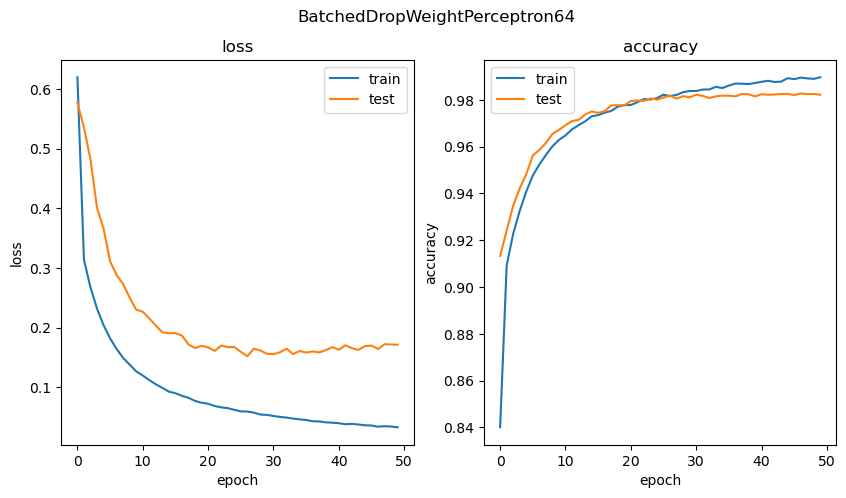

In [24]:
BATCH_SIZE = 64

loaders = {
    'train': DataLoader(dataset=datasets['train'],batch_size=BATCH_SIZE,shuffle=True, pin_memory=True, pin_memory_device=device, num_workers=4),
    'test': DataLoader(dataset=datasets['test'],batch_size=BATCH_SIZE,shuffle=False, pin_memory=True, pin_memory_device=device, num_workers=4)
}

experiment = uuid4()
model = Perceptron(784, 512, 10, p=0.5).to(device)
optimizer = Adam(model.parameters(), lr=0.0002)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__ + str(BATCH_SIZE), id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

model = BatchedDropWeightPerceptron(784, 512, 10, p=0.5).to(device)
optimizer = Adam(model.parameters(), lr=0.0002)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__ + str(BATCH_SIZE), id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

Running experiment Perceptron128 with id 4685c7a0-9734-42b9-8fe3-399e351f07f4
Tensorboard logs are saved in logs/Perceptron128-4685c7a0-9734-42b9-8fe3-399e351f07f4
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): Perceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): Linear(in_features=784, out_features=512, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.5, inplace=False)
      (3): Linear(in_features=512, out_features=10, bias=True)
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0002
    maximize: False
    weight_decay: 0
)
------------------------------------------------------

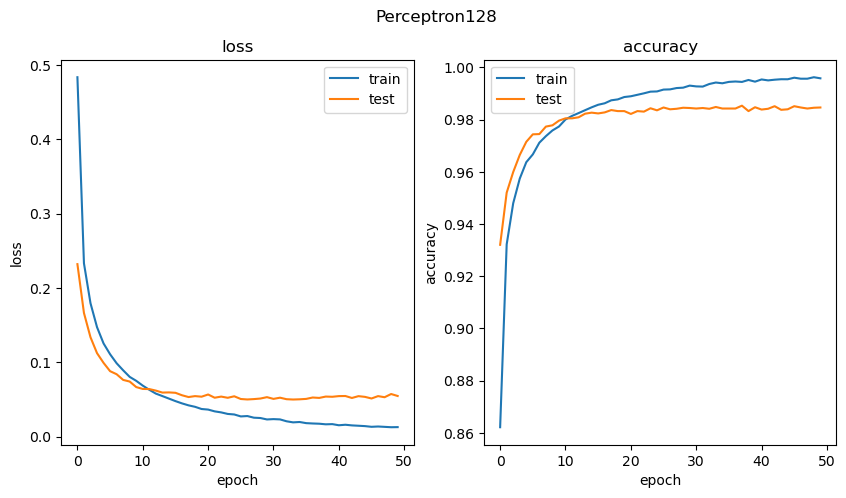

Running experiment BatchedDropWeightPerceptron128 with id 4685c7a0-9734-42b9-8fe3-399e351f07f4
Tensorboard logs are saved in logs/BatchedDropWeightPerceptron128-4685c7a0-9734-42b9-8fe3-399e351f07f4
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): BatchedDropWeightPerceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): BatchedDropWeightLinear(in_features=784, out_features=512, bias=True, p=0.5, max_batch_size=256)
      (1): ReLU()
      (2): BatchedDropWeightLinear(in_features=512, out_features=10, bias=True, p=0.5, max_batch_size=256)
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.000

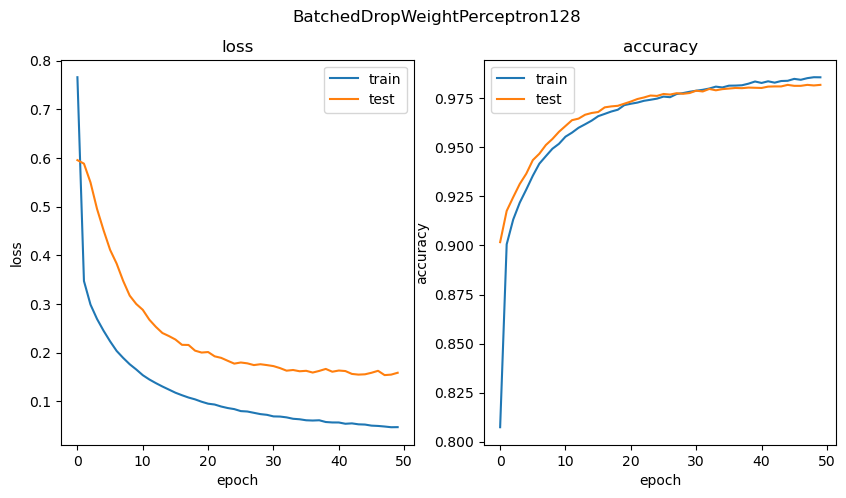

In [25]:
BATCH_SIZE = 128

loaders = {
    'train': DataLoader(dataset=datasets['train'],batch_size=BATCH_SIZE,shuffle=True, pin_memory=True, pin_memory_device=device, num_workers=4),
    'test': DataLoader(dataset=datasets['test'],batch_size=BATCH_SIZE,shuffle=False, pin_memory=True, pin_memory_device=device, num_workers=4)
}

experiment = uuid4()
model = Perceptron(784, 512, 10, p=0.5).to(device)
optimizer = Adam(model.parameters(), lr=0.0002)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__ + str(BATCH_SIZE), id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

model = BatchedDropWeightPerceptron(784, 512, 10, p=0.5).to(device)
optimizer = Adam(model.parameters(), lr=0.0002)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__ + str(BATCH_SIZE), id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

Running experiment Perceptron256 with id 6e23d376-0b12-4458-b52a-71b01279d967
Tensorboard logs are saved in logs/Perceptron256-6e23d376-0b12-4458-b52a-71b01279d967
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): Perceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): Linear(in_features=784, out_features=512, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.5, inplace=False)
      (3): Linear(in_features=512, out_features=10, bias=True)
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0002
    maximize: False
    weight_decay: 0
)
------------------------------------------------------

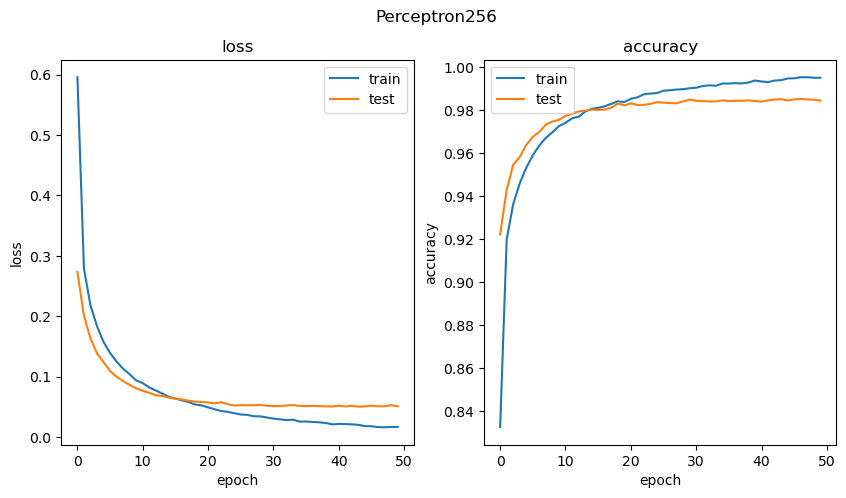

Running experiment BatchedDropWeightPerceptron256 with id 6e23d376-0b12-4458-b52a-71b01279d967
Tensorboard logs are saved in logs/BatchedDropWeightPerceptron256-6e23d376-0b12-4458-b52a-71b01279d967
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): BatchedDropWeightPerceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): BatchedDropWeightLinear(in_features=784, out_features=512, bias=True, p=0.5, max_batch_size=256)
      (1): ReLU()
      (2): BatchedDropWeightLinear(in_features=512, out_features=10, bias=True, p=0.5, max_batch_size=256)
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.000

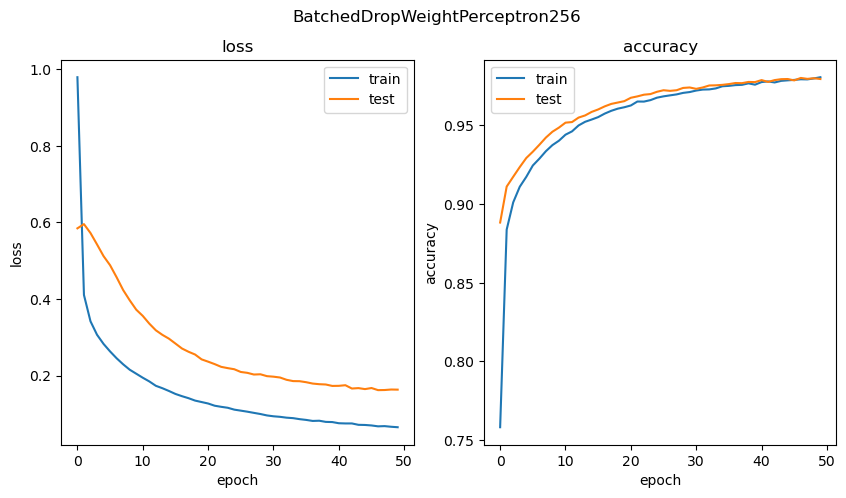

In [26]:
BATCH_SIZE = 256

loaders = {
    'train': DataLoader(dataset=datasets['train'],batch_size=BATCH_SIZE,shuffle=True, pin_memory=True, pin_memory_device=device, num_workers=4),
    'test': DataLoader(dataset=datasets['test'],batch_size=BATCH_SIZE,shuffle=False, pin_memory=True, pin_memory_device=device, num_workers=4)
}

experiment = uuid4()
model = Perceptron(784, 512, 10, p=0.5).to(device)
optimizer = Adam(model.parameters(), lr=0.0002)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__ + str(BATCH_SIZE), id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

model = BatchedDropWeightPerceptron(784, 512, 10, p=0.5).to(device)
optimizer = Adam(model.parameters(), lr=0.0002)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__ + str(BATCH_SIZE), id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

Running experiment Perceptron32 with id eb7564e4-194c-4bd2-872b-19e7187c170c
Tensorboard logs are saved in logs/Perceptron32-eb7564e4-194c-4bd2-872b-19e7187c170c
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): Perceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): Linear(in_features=784, out_features=512, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.5, inplace=False)
      (3): Linear(in_features=512, out_features=10, bias=True)
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0001
    maximize: False
    weight_decay: 0
)
--------------------------------------------------------

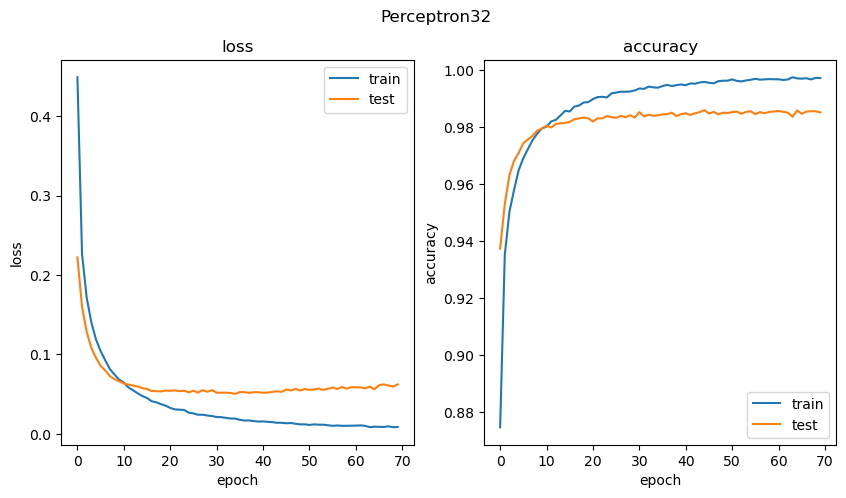

Running experiment BatchedDropWeightPerceptron32 with id eb7564e4-194c-4bd2-872b-19e7187c170c
Tensorboard logs are saved in logs/BatchedDropWeightPerceptron32-eb7564e4-194c-4bd2-872b-19e7187c170c
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): BatchedDropWeightPerceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): BatchedDropWeightLinear(in_features=784, out_features=512, bias=True, p=0.5, max_batch_size=256)
      (1): ReLU()
      (2): BatchedDropWeightLinear(in_features=512, out_features=10, bias=True, p=0.5, max_batch_size=256)
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0001


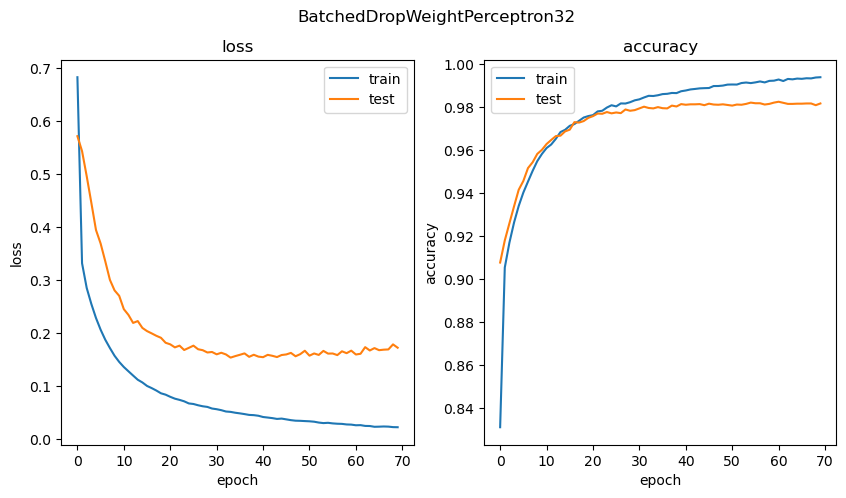

In [27]:
BATCH_SIZE = 32

loaders = {
    'train': DataLoader(dataset=datasets['train'],batch_size=BATCH_SIZE,shuffle=True, pin_memory=True, pin_memory_device=device, num_workers=4),
    'test': DataLoader(dataset=datasets['test'],batch_size=BATCH_SIZE,shuffle=False, pin_memory=True, pin_memory_device=device, num_workers=4)
}

experiment = uuid4()
model = Perceptron(784, 512, 10, p=0.5).to(device)
optimizer = Adam(model.parameters(), lr=0.0001)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__ + str(BATCH_SIZE), id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=70)

model = BatchedDropWeightPerceptron(784, 512, 10, p=0.5).to(device)
optimizer = Adam(model.parameters(), lr=0.0001)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__ + str(BATCH_SIZE), id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=70)

Running experiment Perceptron64 with id 160e8234-6a3a-43da-a1c3-24bf7756016b
Tensorboard logs are saved in logs/Perceptron64-160e8234-6a3a-43da-a1c3-24bf7756016b
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): Perceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): Linear(in_features=784, out_features=512, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.5, inplace=False)
      (3): Linear(in_features=512, out_features=10, bias=True)
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0001
    maximize: False
    weight_decay: 0
)
--------------------------------------------------------

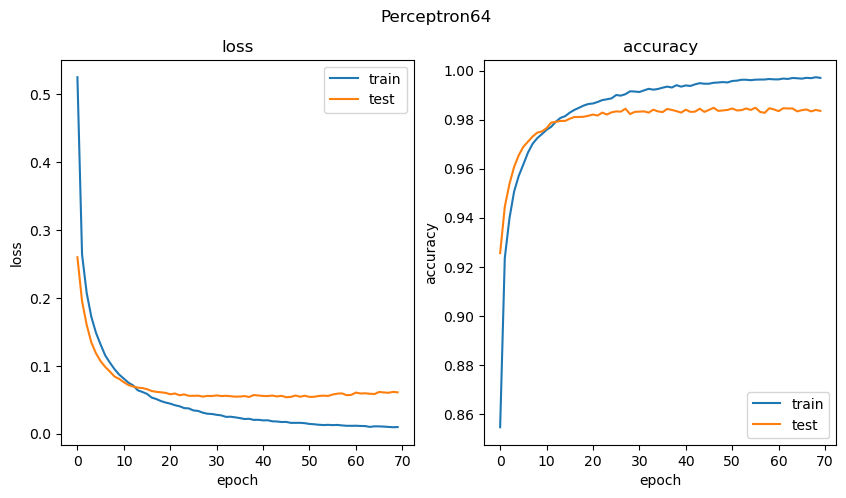

Running experiment BatchedDropWeightPerceptron64 with id 160e8234-6a3a-43da-a1c3-24bf7756016b
Tensorboard logs are saved in logs/BatchedDropWeightPerceptron64-160e8234-6a3a-43da-a1c3-24bf7756016b
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): BatchedDropWeightPerceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): BatchedDropWeightLinear(in_features=784, out_features=512, bias=True, p=0.5, max_batch_size=256)
      (1): ReLU()
      (2): BatchedDropWeightLinear(in_features=512, out_features=10, bias=True, p=0.5, max_batch_size=256)
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0001


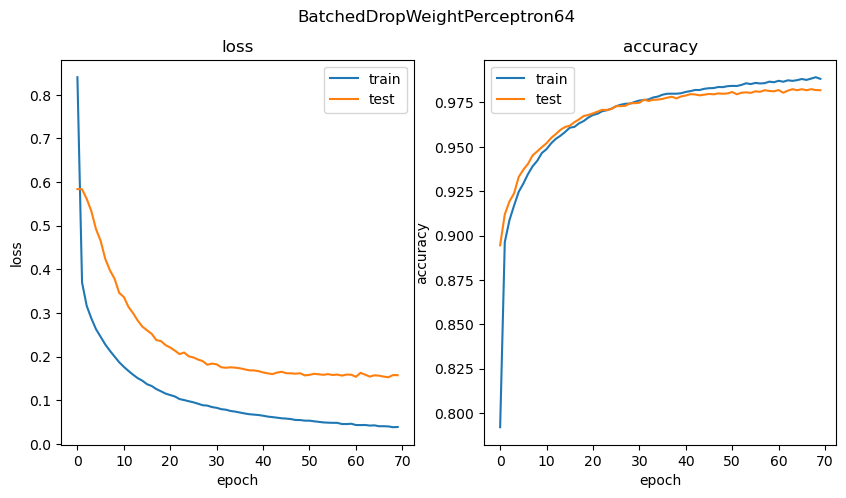

In [28]:
BATCH_SIZE = 64

loaders = {
    'train': DataLoader(dataset=datasets['train'],batch_size=BATCH_SIZE,shuffle=True, pin_memory=True, pin_memory_device=device, num_workers=4),
    'test': DataLoader(dataset=datasets['test'],batch_size=BATCH_SIZE,shuffle=False, pin_memory=True, pin_memory_device=device, num_workers=4)
}

experiment = uuid4()
model = Perceptron(784, 512, 10, p=0.5).to(device)
optimizer = Adam(model.parameters(), lr=0.0001)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__ + str(BATCH_SIZE), id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=70)

model = BatchedDropWeightPerceptron(784, 512, 10, p=0.5).to(device)
optimizer = Adam(model.parameters(), lr=0.0001)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__ + str(BATCH_SIZE), id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=70)

Running experiment Perceptron128 with id c0a302cc-6d44-4a56-ac84-5397f56e6d25
Tensorboard logs are saved in logs/Perceptron128-c0a302cc-6d44-4a56-ac84-5397f56e6d25
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): Perceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): Linear(in_features=784, out_features=512, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.5, inplace=False)
      (3): Linear(in_features=512, out_features=10, bias=True)
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0001
    maximize: False
    weight_decay: 0
)
------------------------------------------------------

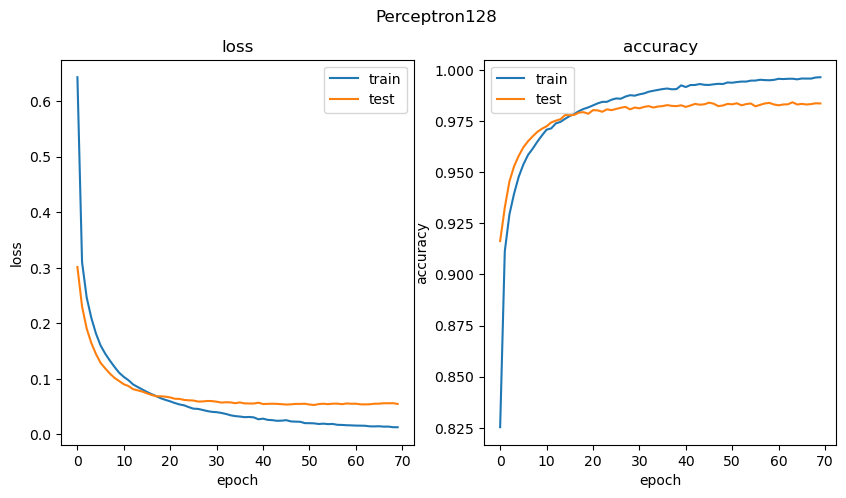

Running experiment BatchedDropWeightPerceptron128 with id c0a302cc-6d44-4a56-ac84-5397f56e6d25
Tensorboard logs are saved in logs/BatchedDropWeightPerceptron128-c0a302cc-6d44-4a56-ac84-5397f56e6d25
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): BatchedDropWeightPerceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): BatchedDropWeightLinear(in_features=784, out_features=512, bias=True, p=0.5, max_batch_size=256)
      (1): ReLU()
      (2): BatchedDropWeightLinear(in_features=512, out_features=10, bias=True, p=0.5, max_batch_size=256)
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.000

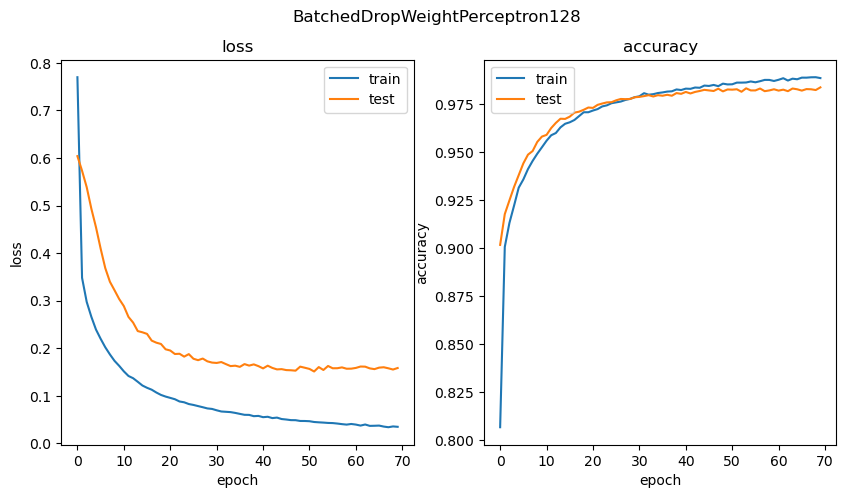

In [29]:
BATCH_SIZE = 128

loaders = {
    'train': DataLoader(dataset=datasets['train'],batch_size=BATCH_SIZE,shuffle=True, pin_memory=True, pin_memory_device=device, num_workers=4),
    'test': DataLoader(dataset=datasets['test'],batch_size=BATCH_SIZE,shuffle=False, pin_memory=True, pin_memory_device=device, num_workers=4)
}

experiment = uuid4()
model = Perceptron(784, 512, 10, p=0.5).to(device)
optimizer = Adam(model.parameters(), lr=0.0001)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__ + str(BATCH_SIZE), id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=70)

model = BatchedDropWeightPerceptron(784, 512, 10, p=0.5).to(device)
optimizer = Adam(model.parameters(), lr=0.0002)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__ + str(BATCH_SIZE), id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=70)

Running experiment Perceptron256 with id 2bc758ca-8ddd-4acf-981a-abc30da5c98c
Tensorboard logs are saved in logs/Perceptron256-2bc758ca-8ddd-4acf-981a-abc30da5c98c
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): Perceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): Linear(in_features=784, out_features=512, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.5, inplace=False)
      (3): Linear(in_features=512, out_features=10, bias=True)
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0001
    maximize: False
    weight_decay: 0
)
------------------------------------------------------

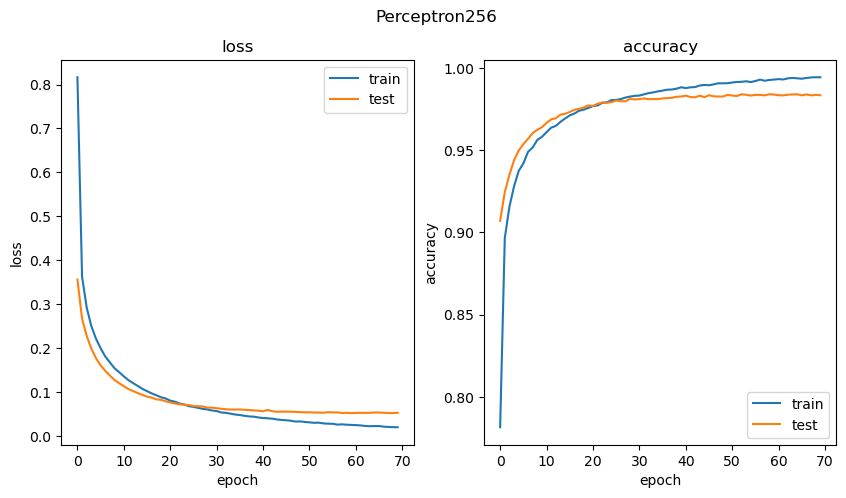

Running experiment BatchedDropWeightPerceptron256 with id 2bc758ca-8ddd-4acf-981a-abc30da5c98c
Tensorboard logs are saved in logs/BatchedDropWeightPerceptron256-2bc758ca-8ddd-4acf-981a-abc30da5c98c
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): BatchedDropWeightPerceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): BatchedDropWeightLinear(in_features=784, out_features=512, bias=True, p=0.5, max_batch_size=256)
      (1): ReLU()
      (2): BatchedDropWeightLinear(in_features=512, out_features=10, bias=True, p=0.5, max_batch_size=256)
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.000

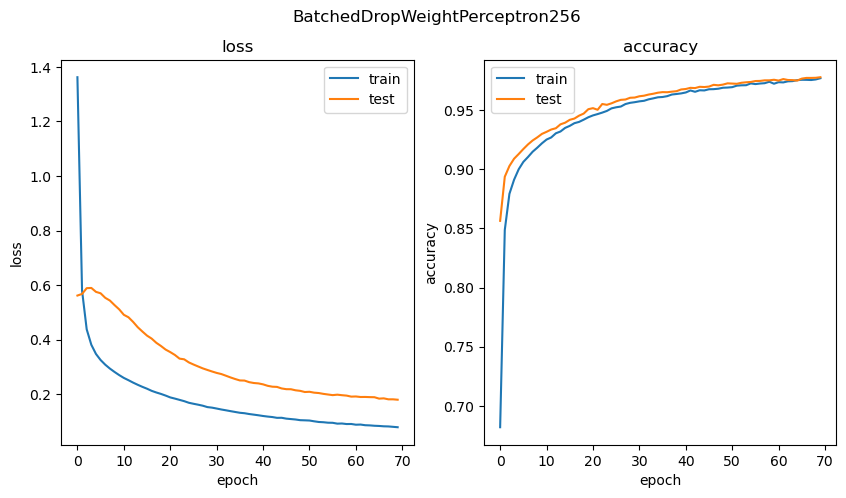

In [30]:
BATCH_SIZE = 256

loaders = {
    'train': DataLoader(dataset=datasets['train'],batch_size=BATCH_SIZE,shuffle=True, pin_memory=True, pin_memory_device=device, num_workers=4),
    'test': DataLoader(dataset=datasets['test'],batch_size=BATCH_SIZE,shuffle=False, pin_memory=True, pin_memory_device=device, num_workers=4)
}

experiment = uuid4()
model = Perceptron(784, 512, 10, p=0.5).to(device)
optimizer = Adam(model.parameters(), lr=0.0001)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__ + str(BATCH_SIZE), id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=70)

model = BatchedDropWeightPerceptron(784, 512, 10, p=0.5).to(device)
optimizer = Adam(model.parameters(), lr=0.0001)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__ + str(BATCH_SIZE), id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=70)